<a href="https://colab.research.google.com/github/Ghostalp07/SPROJ/blob/OEL.ipynb/OEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q transformers torch pillow requests matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.5 MB/s eta 0:00:00


In [ ]:
#MODEL
from transformers import BlipProcessor, BlipForQuestionAnswering
import requests
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

Saving superman.jpg to superman (1).jpg


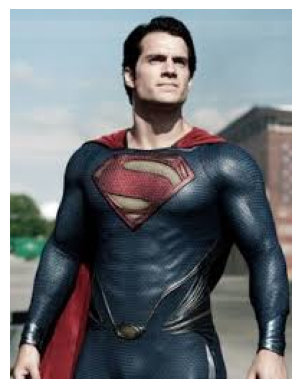

In [ ]:
#file upload
from google.colab import files
upl = files.upload()
image = Image.open(list(upl.keys())[0]).convert("RGB")
plt.axis("off")
plt.imshow(image)

In [ ]:
question = "what vehicle is in the picture"

inputs = processor(image,question,return_tensors="pt")
outputs = model.generate(**inputs)
answer = processor.decode(outputs[0],skip_special_tokens=True)
print("Answers:", answer)

Answers: truck


In [ ]:
questions= {
   "what superhero is in the pic?" ,
    "what is superman doing the pic?",
    "what part of the day looks like?"
}

for question in questions:
  inputs = processor(image,question,return_tensors="pt")
  outputs = model.generate(**inputs)
  answer = processor.decode(outputs[0],skip_special_tokens=True)
  print("Answers:", answer)

Answers: superman
Answers: afternoon
Answers: standing


In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
cap_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
cap_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")


In [ ]:
capti = cap_model.generate(**inputs,max_new_tokens = 50)
capti = cap_processor.decode(capti[0],skip_special_tokens=True)
print("Caption:", capti)

Caption: a picture of superman in the movie


In [ ]:
text = "a picture of"
inputs = cap_processor(image, text, return_tensors="pt")

out = cap_model.generate(**inputs, max_new_tokens=50)
caption = processor.decode(out[0], skip_special_tokens=True)
print("Conditional Caption:", caption)

Conditional Caption: a picture of superman in the movie


In [ ]:
from typing import List, Dict # Import List and Dict

class VQAQuizGenerator:
    def __init__(self):
        self.processor =processor
        self.model = model
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.model.to(self.device)
        self.model.eval()
def generate_questions(self, image_path: str, num_questions: int = 5) -> List[Dict]:
        """Generate multiple-choice questions from an image"""
        raw_image = Image.open(image).convert('RGB')

        caption = self._generate_caption(raw_image)

        entities = self._extract_entities(caption)
        relationships = self._extract_relationships(caption)

        # Generate questions
        questions = []
        for _ in range(num_questions):
            if random.random() > 0.5 and entities:
                # Entity-based question
                question = self._generate_entity_question(entities)
            elif relationships:
                # Relationship-based question
                question = self._generate_relationship_question(relationships)
            else:
                # Fallback to general question
                question = self._generate_general_question(caption)

            if question:
                questions.append(question)

        return questions

In [ ]:
pip install gTTS

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.2.1
    Uninstalling click-8.2.1:
      Successfully uninstalled click-8.2.1


In [ ]:
from gtts import gTTS
import os

language = 'en'
voice = gTTS(text=caption, lang=language, slow=False)
voice.save("image voice.mp3")
os.system("start output.mp3")





32512

In [ ]:
from IPython.display import Audio, display

audio_file = "image voice.mp3"
display(Audio(audio_file, autoplay=True))

In [ ]:
!pip install streamlit
import streamlit as st


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00


In [ ]:
nlp = spacy.load("en_core_web_sm")

class VQAQuizGenerator:
    def __init__(self, caption_model, caption_processor):
        self.caption_model = caption_model
        self.caption_processor = caption_processor
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.caption_model.to(self.device)

    def generate_caption(self, image):
        inputs = self.caption_processor(image, "a picture of", return_tensors="pt").to(self.device)
        output = self.caption_model.generate(**inputs, max_new_tokens=50)
        caption = self.caption_processor.decode(output[0], skip_special_tokens=True)
        return caption

    def extract_entities(self, caption: str) -> List[str]:
        doc = nlp(caption)
        return [ent.text for ent in doc.ents] or [token.text for token in doc if token.pos_ in ("NOUN", "PROPN")]

    def extract_noun_phrases(self, caption: str) -> List[str]:
        doc = nlp(caption)
        return [chunk.text for chunk in doc.noun_chunks if len(chunk.text.split()) > 1]

    def generate_entity_question(self, entity: str, all_entities: List[str]) -> Dict:
        distractors = random.sample([e for e in all_entities if e != entity], k=min(3, len(all_entities)-1)) if len(all_entities) > 1 else ["None", "Unknown", "Not mentioned"]
        options = distractors + [entity]
        random.shuffle(options)
        return {
            "question": f"What is shown in the image related to '{entity}'?",
            "options": options,
            "answer": entity
        }

    def generate_phrase_question(self, phrase: str, all_phrases: List[str]) -> Dict:
        distractors = random.sample([p for p in all_phrases if p != phrase], k=min(3, len(all_phrases)-1)) if len(all_phrases) > 1 else ["Nothing", "Unrelated", "Unclear"]
        options = distractors + [phrase]
        random.shuffle(options)
        return {
            "question": f"What concept does the phrase '{phrase}' represent in the image?",
            "options": options,
            "answer": phrase
        }

    def generate_general_question(self, caption: str) -> Dict:
        return {
            "question": "What is the main subject of the image?",
            "options": [caption, "A random object", "Something unclear", "No idea"],
            "answer": caption
        }

    def generate_questions(self, image, num_questions: int = 5) -> List[Dict]:
        caption = self.generate_caption(image)
        entities = self.extract_entities(caption)
        phrases = self.extract_noun_phrases(caption)

        questions = []

        for _ in range(num_questions):
            choice = random.random()
            if choice < 0.4 and entities:
                selected = random.choice(entities)
                question = self.generate_entity_question(selected, entities)
            elif choice < 0.8 and phrases:
                selected = random.choice(phrases)
                question = self.generate_phrase_question(selected, phrases)
            else:
                question = self.generate_general_question(caption)
            questions.append(question)

        return questions

In [ ]:
# STEP 2: Imports
from transformers import BlipProcessor, BlipForQuestionAnswering, BlipForConditionalGeneration
from PIL import Image
import torch
from gtts import gTTS
import gradio as gr
import random
import spacy
from typing import List, Dict

# STEP 3: Load Models
processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")
cap_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
cap_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")


# STEP 4: Core Functions
def ask_question(image, question):
    inputs = processor(image, question, return_tensors="pt")
    outputs = model.generate(**inputs)
    return processor.decode(outputs[0], skip_special_tokens=True)

def generate_caption(image, text="a picture of"):
    inputs = cap_processor(image, text, return_tensors="pt")
    out = cap_model.generate(**inputs, max_new_tokens=50)
    return cap_processor.decode(out[0], skip_special_tokens=True)

def text_to_speech(text):
    filename = "caption_audio.mp3"
    tts = gTTS(text=text, lang="en", slow=False)
    tts.save(filename)
    return filename


    def _generate_caption(self, image):
        return generate_caption(image)




In [ ]:
with gr.Blocks() as demo:
    gr.Markdown("MYZ VQA+caption+quiz+audio oel")

    with gr.Row():
        img = gr.Image(type="pil", label="Upload Image")
        qbox = gr.Textbox(label="Ask a Question (optional)")

    with gr.Row():
        gen_btn = gr.Button("Generate Answer & Caption")
        quiz_btn = gr.Button("Generate Quiz")

    with gr.Row():
        caption_out = gr.Textbox(label="Caption")
        answer_out = gr.Textbox(label="Answer")

    audio_out = gr.Audio(label="Caption Voice", type="filepath")
    quiz_out = gr.Markdown(label="Generated Quiz")

    gen_btn.click(fn=process_image, inputs=[img, qbox], outputs=[caption_out, answer_out, audio_out])
    quiz_btn.click(fn=generate_quiz, inputs=[img], outputs=[quiz_out])

# STEP 8: Launch
demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3f93ad29b47c3643e2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [2]:
!git config --global user.email "myahyazubair04@gmail.com"
!git config --global user.name "Ghostalp07"

In [15]:
!git clone https://github.com/Ghostalp07/SPROJ.git
%cd SPROJ

Cloning into 'SPROJ'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.
/content/VQNA/SPROJ


In [17]:
!git add OEL.ipynb
!git commit -m "Add OEL.ipynb"

fatal: pathspec 'OEL.ipynb' did not match any files
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
